### 1. Check FileStore Contents

In [0]:
# Check the contents in tables folder
display(dbutils.fs.ls("/FileStore/tables"))

path,name,size,modificationTime
dbfs:/FileStore/tables/weekly_sales_data.csv,weekly_sales_data.csv,12373,1675033965000


#### 2. Mount S3 Bucket

In [0]:
# pyspark functions
from pyspark.sql.functions import *

# URL processing
import urllib

In [0]:
ACCESS_KEY="xxxxxxxxx"
SECRET_KEY="xxxxxxxxx"
ENCODED_SECRET_KEY= urllib.parse.quote(SECRET_KEY, "")
AWS_BUCKET_NAME="big-data-time-series-forecasting"
MOUNT_NAME= "s3data"
dbutils.fs.mount("s3n://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_BUCKET_NAME), "/mnt/%s" % MOUNT_NAME)

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
<command-250559426160925> in <cell line: 6>()
      4 AWS_BUCKET_NAME="big-data-time-series-forecasting"
      5 MOUNT_NAME= "s3data"
----> 6 dbutils.fs.mount("s3n://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_BUCKET_NAME), "/mnt/%s" % MOUNT_NAME)

/databricks/python_shell/dbruntime/dbutils.py in f_with_exception_handling(*args, **kwargs)
    360                     exc.__context__ = None
    361                     exc.__cause__ = None
--> 362                     raise exc
    363 
    364             return f_with_exception_handling

ExecutionError: An error occurred while calling o1389.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/s3data; nested exception is: 
	java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/s3dat

In [0]:
display(dbutils.fs.ls("/mnt/s3data"))

path,name,size,modificationTime
dbfs:/mnt/s3data/weekly_sales_data.csv,weekly_sales_data.csv,12373,1674785560000


#### 3. Installing the necessary dependency

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

%pip install prophet

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import prophet as Prophet
import pandas as pd

#### 4. Use the mounted cluster for creating the model

In [0]:
# File Location and type
file_location= "dbfs:/mnt/s3data/weekly_sales_data.csv"
file_type="csv"

# CSV options
infer_schema= "true"
first_row_is_header= "true"
delimiter= ","

# applied options are for csv files. For other file types, these will be ifnored

df= spark.read.format(file_type)\
   .option("multiline", "true")\
   .option("inferSchema", infer_schema)\
   .option("header", first_row_is_header)\
   .option("sep", delimiter)\
   .load(file_location)

display(df)

date,store_id,sales
2019-01-06,25,736657.2267
2019-01-06,26,233711.0
2019-01-06,28,692156.3794
2019-01-06,29,213706.8
2019-01-06,30,266455.0
2019-01-06,31,837342.8156
2019-01-06,35,201013.6
2019-01-06,38,242397.03
2019-01-06,41,244189.4
2019-01-06,44,164553.5


#### 4. checking the Data

In [0]:
display(df)

date,store_id,sales
2019-01-06,25,736657.2267
2019-01-06,26,233711.0
2019-01-06,28,692156.3794
2019-01-06,29,213706.8
2019-01-06,30,266455.0
2019-01-06,31,837342.8156
2019-01-06,35,201013.6
2019-01-06,38,242397.03
2019-01-06,41,244189.4
2019-01-06,44,164553.5


In [0]:
df.printSchema()
df.show(truncate=False)

root
 |-- date: date (nullable = true)
 |-- store_id: integer (nullable = true)
 |-- sales: double (nullable = true)

+----------+--------+-----------+
|date      |store_id|sales      |
+----------+--------+-----------+
|2019-01-06|25      |736657.2267|
|2019-01-06|26      |233711.0   |
|2019-01-06|28      |692156.3794|
|2019-01-06|29      |213706.8   |
|2019-01-06|30      |266455.0   |
|2019-01-06|31      |837342.8156|
|2019-01-06|35      |201013.6   |
|2019-01-06|38      |242397.03  |
|2019-01-06|41      |244189.4   |
|2019-01-06|44      |164553.5   |
|2019-01-13|25      |696457.1717|
|2019-01-13|26      |261136.45  |
|2019-01-13|28      |787359.03  |
|2019-01-13|29      |279218.0   |
|2019-01-13|30      |252519.59  |
|2019-01-13|31      |836604.5717|
|2019-01-13|35      |277550.185 |
|2019-01-13|38      |215895.275 |
|2019-01-13|41      |231992.5   |
|2019-01-13|44      |134188.0   |
+----------+--------+-----------+
only showing top 20 rows



In [0]:
pandasDF = df.toPandas()

In [0]:
pandasDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      500 non-null    object 
 1   store_id  500 non-null    int32  
 2   sales     500 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 9.9+ KB


#### 5. Changing the date time format

In [0]:
pandasDF['date']=pd.to_datetime(pandasDF['date'], infer_datetime_format=True)

In [0]:
pandasDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      500 non-null    datetime64[ns]
 1   store_id  500 non-null    int32         
 2   sales     500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 9.9 KB


In [0]:
print("\nFeatures : \n", pandasDF.columns.to_list())
print("\nMissing values : ", pandasDF.isnull().any())
print("\nUnique values : \n", pandasDF.nunique())


Features : 
 ['date', 'store_id', 'sales']

Missing values :  date        False
store_id    False
sales       False
dtype: bool

Unique values : 
 date         50
store_id     10
sales       500
dtype: int64


In [0]:
df_base=pandasDF.copy()

In [0]:
pandasDF.describe()

,store_id,sales
count,500.0000,5.000000e+02
mean,32.7000,4.470800e+05
std,6.1714,2.970660e+05
min,25.0000,1.278800e+04
25%,28.0000,2.526557e+05
50%,30.5000,3.150259e+05
75%,38.0000,6.845418e+05
max,44.0000,1.631585e+06


In [0]:
pandasDF['store_id'].value_counts()

Out[20]: 25    50
26    50
28    50
29    50
30    50
31    50
35    50
38    50
41    50
44    50
Name: store_id, dtype: int64

In [0]:
item_df= pandasDF.set_index('date')

#### 6. Checking the time series distribution

Out[22]: <AxesSubplot:xlabel='date'>

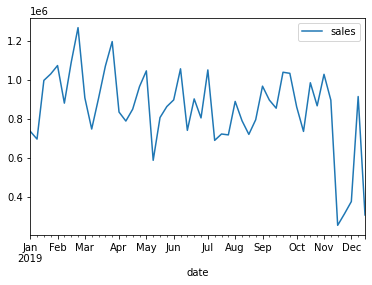

In [0]:
item_df.query("store_id==25")[['sales']].plot()

Out[23]: <AxesSubplot:xlabel='date'>

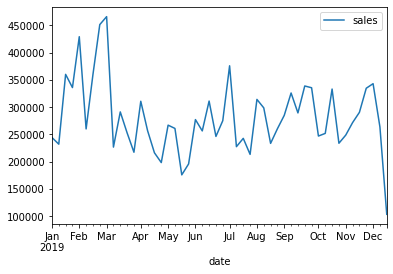

In [0]:
item_df.query("store_id==41")[['sales']].plot()

#### 7. Transforming the dataframe to pyspark

In [0]:
sdf= spark.createDataFrame(pandasDF)

In [0]:
sdf.show(5)

+-------------------+--------+-----------+
|               date|store_id|      sales|
+-------------------+--------+-----------+
|2019-01-06 00:00:00|      25|736657.2267|
|2019-01-06 00:00:00|      26|   233711.0|
|2019-01-06 00:00:00|      28|692156.3794|
|2019-01-06 00:00:00|      29|   213706.8|
|2019-01-06 00:00:00|      30|   266455.0|
+-------------------+--------+-----------+
only showing top 5 rows



In [0]:
sdf.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- store_id: integer (nullable = true)
 |-- sales: double (nullable = true)



In [0]:
sdf.count()

Out[27]: 500

In [0]:
sdf.select(['store_id']).groupBy('store_id').agg({'store_id':'count'}).show()

+--------+---------------+
|store_id|count(store_id)|
+--------+---------------+
|      31|             50|
|      28|             50|
|      26|             50|
|      44|             50|
|      41|             50|
|      35|             50|
|      38|             50|
|      25|             50|
|      29|             50|
|      30|             50|
+--------+---------------+



#### 8. Create a Temp view table for SQL queries

In [0]:
sdf.createOrReplaceTempView("sales")

In [0]:
spark.sql("select store_id, count(*) from sales group by store_id order by store_id").show()

+--------+--------+
|store_id|count(1)|
+--------+--------+
|      25|      50|
|      26|      50|
|      28|      50|
|      29|      50|
|      30|      50|
|      31|      50|
|      35|      50|
|      38|      50|
|      41|      50|
|      44|      50|
+--------+--------+



#### 9. As the spark is a distributed framework and there is a need to separate the dataframe based on store id we will repartition the data based on store id and also convert the dataframe for prophet type dataframe

In [0]:
sql="Select store_id, date as ds, sum(sales) as y FROM sales Group By store_id, ds ORDER BY store_id, ds"

In [0]:
spark.sql(sql).show()

+--------+-------------------+-----------+
|store_id|                 ds|          y|
+--------+-------------------+-----------+
|      25|2019-01-06 00:00:00|736657.2267|
|      25|2019-01-13 00:00:00|696457.1717|
|      25|2019-01-20 00:00:00| 996876.875|
|      25|2019-01-27 00:00:00| 1029737.05|
|      25|2019-02-03 00:00:00|1072873.705|
|      25|2019-02-10 00:00:00|880462.4681|
|      25|2019-02-17 00:00:00| 1088756.78|
|      25|2019-02-24 00:00:00|1266928.313|
|      25|2019-03-03 00:00:00|907510.1217|
|      25|2019-03-10 00:00:00|747920.9824|
|      25|2019-03-17 00:00:00|904750.3158|
|      25|2019-03-24 00:00:00|1069857.589|
|      25|2019-03-31 00:00:00|1195574.314|
|      25|2019-04-07 00:00:00|834911.3333|
|      25|2019-04-14 00:00:00|788777.4167|
|      25|2019-04-21 00:00:00|849603.4333|
|      25|2019-04-28 00:00:00| 965521.165|
|      25|2019-05-05 00:00:00|1045632.688|
|      25|2019-05-12 00:00:00| 587768.245|
|      25|2019-05-19 00:00:00|806767.5946|
+--------+-

In [0]:
sdf.explain()

== Physical Plan ==
LocalTableScan [date#2314, store_id#2315, sales#2316]


== Photon Explanation ==
Photon does not fully support the query because:
	Unsupported node: LocalTableScan [date#2314, store_id#2315, sales#2316]
reference node:
	LocalTableScan [date#2314, store_id#2315, sales#2316]


In [0]:
sdf.rdd.getNumPartitions()

Out[34]: 8

In [0]:
store_part=(spark.sql(sql).repartition(spark.sparkContext.defaultParallelism, ['store_id'])).cache()

In [0]:
store_part.explain()

== Physical Plan ==
*(1) ColumnarToRow
+- PhotonResultStage
   +- PhotonRowToColumnar
      +- InMemoryTableScan [store_id#2315, ds#2540, y#2541], true
            +- InMemoryRelation [store_id#2315, ds#2540, y#2541], StorageLevel(disk, memory, deserialized, 1 replicas)
                  +- Exchange hashpartitioning(store_id#144, 8), REPARTITION_BY_NUM, [plan_id=607]
                     +- *(2) HashAggregate(keys=[store_id#144, date#143], functions=[finalmerge_sum(merge sum#240) AS sum(sales#145)#235])
                        +- Exchange hashpartitioning(store_id#144, date#143, 200), ENSURE_REQUIREMENTS, [plan_id=603]
                           +- *(1) HashAggregate(keys=[store_id#144, date#143], functions=[partial_sum(sales#145) AS sum#240])
                              +- *(1) LocalTableScan [date#143, store_id#144, sales#145]


== Photon Explanation ==
The query is fully supported by Photon.


#### 10. Create the result Schema

In [0]:
from pyspark.sql.types import*

result_schema= StructType([
    StructField('ds', TimestampType()),
    StructField('store_id', IntegerType()),
    StructField('y', DoubleType()),
    StructField('yhat', DoubleType()),
    StructField('yhat_upper', DoubleType()),
    StructField('yhat_lower', DoubleType())
])

#### parameters:- confidence interval = 0.95, seasonality = multiplicative, data has weekly seasonality, data has yearly seasonality
#### predictions:- predict data for next 5 periods , the prediction should be weekly

In [0]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf( result_schema, PandasUDFType.GROUPED_MAP )
def forecast_sales(store_pd):
    model= prophet.Prophet(interval_width=0.95, seasonality_mode= "multiplicative", weekly_seasonality=True, yearly_seasonality=True)
    
    model.fit( store_pd )
    
    future_pd=model.make_future_dataframe(
    periods=5,
    freq='w'
    )
    
    forecast_pd= model.predict( future_pd )
    
    f_pd= forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
    
    st_pd=store_pd[['ds','store_id','y']].set_index('ds')
    
    results_pd=f_pd.join(st_pd, how='left')
    results_pd.reset_index(level=0, inplace=True)
    
    results_pd['store_id']=store_pd['store_id'].iloc[0]
    
    return results_pd[['ds','store_id', 'y', 'yhat', 'yhat_upper', 'yhat_lower']]

In [0]:
from pyspark.sql.functions import current_date

results=(store_part.groupBy('store_id').apply(forecast_sales).withColumn('training_date', current_date()))

In [0]:
results.cache()

Out[52]: DataFrame[ds: timestamp, store_id: int, y: double, yhat: double, yhat_upper: double, yhat_lower: double, training_date: date]

In [0]:
results.show()

+-------------------+--------+-----------+------------------+------------------+------------------+-------------+
|                 ds|store_id|          y|              yhat|        yhat_upper|        yhat_lower|training_date|
+-------------------+--------+-----------+------------------+------------------+------------------+-------------+
|2019-01-06 00:00:00|      38|  242397.03| 235457.6288451057| 328429.6343035331|145559.23973195752|   2023-01-30|
|2019-01-13 00:00:00|      38| 215895.275|219614.34372856564|318751.58672469103|118681.32014333931|   2023-01-30|
|2019-01-20 00:00:00|      38|  311186.15| 330985.9378671422| 425926.4325025662| 235496.1180345639|   2023-01-30|
|2019-01-27 00:00:00|      38|413084.9333|392584.28272884374| 491701.4286637906| 295155.5967219229|   2023-01-30|
|2019-02-03 00:00:00|      38|399851.8183|363253.84904487495| 442659.6059565536|266538.95783201355|   2023-01-30|
|2019-02-10 00:00:00|      38|   264357.4| 319465.3526390652| 413417.0350360444|222161.2

In [0]:
results.explain()

== Physical Plan ==
*(1) ColumnarToRow
+- PhotonResultStage
   +- PhotonRowToColumnar
      +- InMemoryTableScan [ds#3435, store_id#3436, y#3437, yhat#3438, yhat_upper#3439, yhat_lower#3440, training_date#3447], true
            +- InMemoryRelation [ds#3435, store_id#3436, y#3437, yhat#3438, yhat_upper#3439, yhat_lower#3440, training_date#3447], StorageLevel(disk, memory, deserialized, 1 replicas)
                  +- *(2) Project [ds#3435, store_id#3436, y#3437, yhat#3438, yhat_upper#3439, yhat_lower#3440, 2023-01-30 AS training_date#3447]
                     +- FlatMapGroupsInPandas [store_id#2315], forecast_sales(store_id#2315, ds#2540, y#2541)#3434, [ds#3435, store_id#3436, y#3437, yhat#3438, yhat_upper#3439, yhat_lower#3440]
                        +- *(1) ColumnarToRow
                           +- PhotonResultStage
                              +- PhotonSort [store_id#2315 ASC NULLS FIRST]
                                 +- PhotonRowToColumnar
                                 

In [0]:
results.coalesce(1)

Out[56]: DataFrame[ds: timestamp, store_id: int, y: double, yhat: double, yhat_upper: double, yhat_lower: double, training_date: date]

In [0]:
results.count()

Out[57]: 550

In [0]:
results.createOrReplaceTempView('forecasted')

In [0]:
spark.sql("Select store_id, count(*) from forecasted group by store_id").show()

+--------+--------+
|store_id|count(1)|
+--------+--------+
|      31|      55|
|      25|      55|
|      28|      55|
|      35|      55|
|      38|      55|
|      26|      55|
|      41|      55|
|      44|      55|
|      29|      55|
|      30|      55|
+--------+--------+



In [0]:
final_df=results.toPandas()

In [0]:
final_df

,ds,store_id,y,yhat,yhat_upper,yhat_lower,training_date
0,2019-01-06,38,242397.0300,235457.628845,328429.634304,145559.239732,2023-01-30
1,2019-01-13,38,215895.2750,219614.343729,318751.586725,118681.320143,2023-01-30
2,2019-01-20,38,311186.1500,330985.937867,425926.432503,235496.118035,2023-01-30
3,2019-01-27,38,413084.9333,392584.282729,491701.428664,295155.596722,2023-01-30
4,2019-02-03,38,399851.8183,363253.849045,442659.605957,266538.957832,2023-01-30
...,...,...,...,...,...,...,...
545,2019-12-22,35,NaN,24401.808232,82289.082066,-40413.675602,2023-01-30
546,2019-12-29,35,NaN,21873.160511,82573.208534,-42861.562404,2023-01-30
547,2020-01-05,35,NaN,70003.193096,127963.261023,8482.195151,2023-01-30
548,2020-01-12,35,NaN,108935.216009,171657.061162,48200.705346,2023-01-30


In [0]:
final_df=final_df.set_index('ds')

#### 12. Visualizing the result

Out[70]: <AxesSubplot:xlabel='ds'>

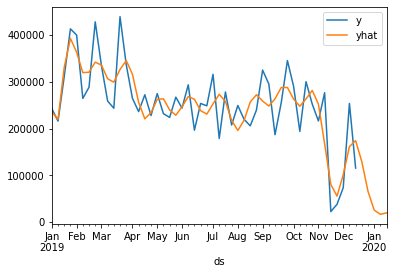

In [0]:
final_df.query('store_id==38')[['y', 'yhat']].plot()

Out[71]: <AxesSubplot:xlabel='ds'>

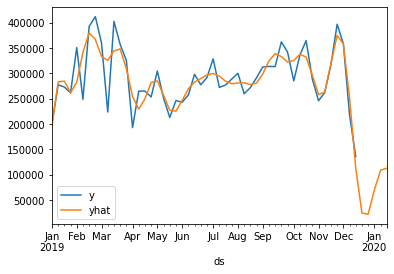

In [0]:
final_df.query('store_id==35')[['y', 'yhat']].plot()

Out[69]: <AxesSubplot:xlabel='ds'>

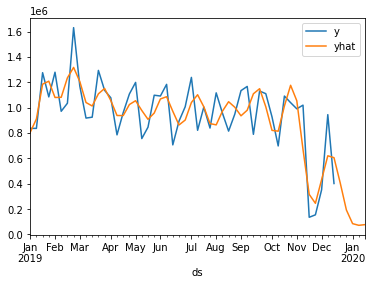

In [0]:
final_df.query('store_id==31')[['y', 'yhat']].plot()